Data from https://environment.data.gov.uk/water-quality/view/download#

Cambridgeshire and Bedfordshire\
Monitoring\
2016-2019



In [2]:
# Libraries

%matplotlib inline


import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import sklearn as skl
import scipy as sci
import scipy.io as sio

from sklearn import linear_model, model_selection, metrics

import dateutil.parser as parser

In [1]:
# Data paths

from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

data_path='/content/drive/MyDrive/2022_SFC_IDSP/Project/Datasets/'

results_path='/content/drive/My Drive/2022_SFC_IDSP/Project/Python_Notebooks/UK-Dataset/'

Mounted at /content/drive/


## Clean the data

In [3]:
waterDataFull = pd.read_csv(data_path+'CB-2016-M.csv')
waterDataFull.head(10)

,@id,sample.samplingPoint,sample.samplingPoint.notation,sample.samplingPoint.label,sample.sampleDateTime,determinand.label,determinand.definition,determinand.notation,resultQualifier.notation,result,codedResultInterpretation.interpretation,determinand.unit.label,sample.sampledMaterialType.label,sample.isComplianceSample,sample.purpose.label,sample.samplingPoint.easting,sample.samplingPoint.northing
0,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-01M02,SYRESHAM STR.TRIB.OUSE.A43 RD.BR.KINDSHL,2016-01-13T11:13:00,Orthophospht,"Orthophosphate, reactive as P",180,NaN,0.0720,NaN,mg/l,RIVER / RUNNING SURFACE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400
1,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-01M02,SYRESHAM STR.TRIB.OUSE.A43 RD.BR.KINDSHL,2016-01-13T11:13:00,Oxygen Diss,"Oxygen, Dissolved as O2",9924,NaN,10.7000,NaN,mg/l,RIVER / RUNNING SURFACE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400
2,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-01M02,SYRESHAM STR.TRIB.OUSE.A43 RD.BR.KINDSHL,2016-01-13T11:13:00,O Diss %sat,"Oxygen, Dissolved, % Saturation",9901,NaN,84.5000,NaN,%,RIVER / RUNNING SURFACE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400
3,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-01M02,SYRESHAM STR.TRIB.OUSE.A43 RD.BR.KINDSHL,2016-01-13T11:13:00,N Oxidised,"Nitrogen, Total Oxidised as N",116,NaN,4.2600,NaN,mg/l,RIVER / RUNNING SURFACE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400
4,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-01M02,SYRESHAM STR.TRIB.OUSE.A43 RD.BR.KINDSHL,2016-01-13T11:13:00,Ammonia(N),Ammoniacal Nitrogen as N,111,<,0.0300,NaN,mg/l,RIVER / RUNNING SURFACE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400
5,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-01M02,SYRESHAM STR.TRIB.OUSE.A43 RD.BR.KINDSHL,2016-01-13T11:13:00,Cond @ 25C,Conductivity at 25 C,77,NaN,546.0000,NaN,us/cm,RIVER / RUNNING SURFACE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400
6,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-01M02,SYRESHAM STR.TRIB.OUSE.A43 RD.BR.KINDSHL,2016-01-13T11:13:00,Alky pH 4.5,Alkalinity to pH 4.5 as CaCO3,162,NaN,160.0000,NaN,mg/l,RIVER / RUNNING SURFACE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400
7,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-01M02,SYRESHAM STR.TRIB.OUSE.A43 RD.BR.KINDSHL,2016-01-13T11:13:00,Temp Water,Temperature of Water,76,NaN,5.1000,NaN,cel,RIVER / RUNNING SURFACE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400
8,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-01M02,SYRESHAM STR.TRIB.OUSE.A43 RD.BR.KINDSHL,2016-01-13T11:13:00,Phosphorus-P,"Phosphorus, Total as P",348,NaN,0.1530,NaN,mg/l,RIVER / RUNNING SURFACE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400
9,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-01M02,SYRESHAM STR.TRIB.OUSE.A43 RD.BR.KINDSHL,2016-01-13T11:13:00,Nitrite-N,Nitrite as N,118,NaN,0.0142,NaN,mg/l,RIVER / RUNNING SURFACE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400


In [5]:
waterDataFull.columns
print(waterDataFull.shape)

(61905, 17)


In [ ]:
# Some of these columns are not interesting for our analysis, so we will drop those

wD = waterDataFull.drop(['sample.samplingPoint','sample.samplingPoint.label','resultQualifier.notation',
                     'codedResultInterpretation.interpretation','sample.isComplianceSample'], axis = 1)

print('Number of columns is: ',len(wD.columns))
wD

Number of columns is:  12


,@id,sample.samplingPoint.notation,sample.sampleDateTime,determinand.label,determinand.definition,determinand.notation,result,determinand.unit.label,sample.sampledMaterialType.label,sample.purpose.label,sample.samplingPoint.easting,sample.samplingPoint.northing
0,http://environment.data.gov.uk/water-quality/d...,AN-01M02,2016-01-13T11:13:00,Orthophospht,"Orthophosphate, reactive as P",180,0.072,mg/l,RIVER / RUNNING SURFACE WATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400
1,http://environment.data.gov.uk/water-quality/d...,AN-01M02,2016-01-13T11:13:00,Oxygen Diss,"Oxygen, Dissolved as O2",9924,10.700,mg/l,RIVER / RUNNING SURFACE WATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400
2,http://environment.data.gov.uk/water-quality/d...,AN-01M02,2016-01-13T11:13:00,O Diss %sat,"Oxygen, Dissolved, % Saturation",9901,84.500,%,RIVER / RUNNING SURFACE WATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400
3,http://environment.data.gov.uk/water-quality/d...,AN-01M02,2016-01-13T11:13:00,N Oxidised,"Nitrogen, Total Oxidised as N",116,4.260,mg/l,RIVER / RUNNING SURFACE WATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400
4,http://environment.data.gov.uk/water-quality/d...,AN-01M02,2016-01-13T11:13:00,Ammonia(N),Ammoniacal Nitrogen as N,111,0.030,mg/l,RIVER / RUNNING SURFACE WATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400
...,...,...,...,...,...,...,...,...,...,...,...,...
61900,http://environment.data.gov.uk/water-quality/d...,AN-WINFARSG,2016-12-14T13:45:00,Mo Diss,"Molybdenum, Dissolved",6830,3.000,ug/l,GROUNDWATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,609180,288260
61901,http://environment.data.gov.uk/water-quality/d...,AN-WINFARSG,2016-12-14T13:45:00,Linuron,Linuron,3118,0.010,ug/l,GROUNDWATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,609180,288260
61902,http://environment.data.gov.uk/water-quality/d...,AN-WINFARSG,2016-12-14T13:45:00,"1,2,3-Trimet","1,2,3-Trimethylbenzene",9457,0.100,ug/l,GROUNDWATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,609180,288260
61903,http://environment.data.gov.uk/water-quality/d...,AN-WINFARSG,2016-12-14T13:45:00,Chloroform,Chloroform :- {Trichloromethane},3373,0.100,ug/l,GROUNDWATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,609180,288260


In [ ]:
# Look at the columns types

wD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61905 entries, 0 to 61904
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   @id                               61905 non-null  object 
 1   sample.samplingPoint.notation     61905 non-null  object 
 2   sample.sampleDateTime             61905 non-null  object 
 3   determinand.label                 61905 non-null  object 
 4   determinand.definition            61905 non-null  object 
 5   determinand.notation              61905 non-null  int64  
 6   result                            61905 non-null  float64
 7   determinand.unit.label            61905 non-null  object 
 8   sample.sampledMaterialType.label  61905 non-null  object 
 9   sample.purpose.label              61905 non-null  object 
 10  sample.samplingPoint.easting      61905 non-null  int64  
 11  sample.samplingPoint.northing     61905 non-null  int64  
dtypes: f

In [ ]:
# Change column type. First transform to datetime then separate into different columns

wD['sample.sampleDateTime'] = pd.to_datetime(wD['sample.sampleDateTime'])
wD['Year'] = wD['sample.sampleDateTime'].dt.year
wD['Month'] = wD['sample.sampleDateTime'].dt.month
wD['Day'] = wD['sample.sampleDateTime'].dt.day
wD['Hour'] = wD['sample.sampleDateTime'].dt.hour

wD.head()


,@id,sample.samplingPoint.notation,sample.sampleDateTime,determinand.label,determinand.definition,determinand.notation,result,determinand.unit.label,sample.sampledMaterialType.label,sample.purpose.label,sample.samplingPoint.easting,sample.samplingPoint.northing,Year,Month,Day,Hour
0,http://environment.data.gov.uk/water-quality/d...,AN-01M02,2016-01-13 11:13:00,Orthophospht,"Orthophosphate, reactive as P",180,0.072,mg/l,RIVER / RUNNING SURFACE WATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400,2016,1,13,11
1,http://environment.data.gov.uk/water-quality/d...,AN-01M02,2016-01-13 11:13:00,Oxygen Diss,"Oxygen, Dissolved as O2",9924,10.700,mg/l,RIVER / RUNNING SURFACE WATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400,2016,1,13,11
2,http://environment.data.gov.uk/water-quality/d...,AN-01M02,2016-01-13 11:13:00,O Diss %sat,"Oxygen, Dissolved, % Saturation",9901,84.500,%,RIVER / RUNNING SURFACE WATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400,2016,1,13,11
3,http://environment.data.gov.uk/water-quality/d...,AN-01M02,2016-01-13 11:13:00,N Oxidised,"Nitrogen, Total Oxidised as N",116,4.260,mg/l,RIVER / RUNNING SURFACE WATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400,2016,1,13,11
4,http://environment.data.gov.uk/water-quality/d...,AN-01M02,2016-01-13 11:13:00,Ammonia(N),Ammoniacal Nitrogen as N,111,0.030,mg/l,RIVER / RUNNING SURFACE WATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400,2016,1,13,11


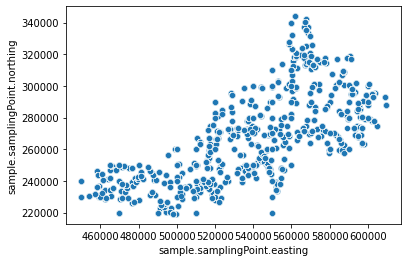

In [ ]:
# Coordinate plot

sns.scatterplot(data=wD, x='sample.samplingPoint.easting',y='sample.samplingPoint.northing')

In [ ]:
# Keep only selected parameters
# 61 - pH,76 - temperature, 77 -conductivity, 9924 - oxygen, Dissolved as O2
# 111 - ammoniacal Nitrogen as N, 119 - ammonia un-ionised as N
# 117 - nitrate as N, 118 - nitrite as N

keywords = [61,76,77,111,117,118,119,9924]

wD_selected = wD[wD['determinand.notation'].isin(keywords)].copy()
wD_selected

,@id,sample.samplingPoint.notation,sample.sampleDateTime,determinand.label,determinand.definition,determinand.notation,result,determinand.unit.label,sample.sampledMaterialType.label,sample.purpose.label,sample.samplingPoint.easting,sample.samplingPoint.northing,Year,Month,Day,Hour
1,http://environment.data.gov.uk/water-quality/d...,AN-01M02,2016-01-13 11:13:00,Oxygen Diss,"Oxygen, Dissolved as O2",9924,10.7000,mg/l,RIVER / RUNNING SURFACE WATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400,2016,1,13,11
4,http://environment.data.gov.uk/water-quality/d...,AN-01M02,2016-01-13 11:13:00,Ammonia(N),Ammoniacal Nitrogen as N,111,0.0300,mg/l,RIVER / RUNNING SURFACE WATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400,2016,1,13,11
5,http://environment.data.gov.uk/water-quality/d...,AN-01M02,2016-01-13 11:13:00,Cond @ 25C,Conductivity at 25 C,77,546.0000,us/cm,RIVER / RUNNING SURFACE WATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400,2016,1,13,11
7,http://environment.data.gov.uk/water-quality/d...,AN-01M02,2016-01-13 11:13:00,Temp Water,Temperature of Water,76,5.1000,cel,RIVER / RUNNING SURFACE WATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400,2016,1,13,11
9,http://environment.data.gov.uk/water-quality/d...,AN-01M02,2016-01-13 11:13:00,Nitrite-N,Nitrite as N,118,0.0142,mg/l,RIVER / RUNNING SURFACE WATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,463800,241400,2016,1,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61753,http://environment.data.gov.uk/water-quality/d...,AN-WINFARSG,2016-12-14 13:45:00,Cond @ 25C,Conductivity at 25 C,77,752.0000,us/cm,GROUNDWATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,609180,288260,2016,12,14,13
61770,http://environment.data.gov.uk/water-quality/d...,AN-WINFARSG,2016-12-14 13:45:00,Nitrate-N,Nitrate as N,117,0.1960,mg/l,GROUNDWATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,609180,288260,2016,12,14,13
61782,http://environment.data.gov.uk/water-quality/d...,AN-WINFARSG,2016-12-14 13:45:00,pH,pH,61,7.0800,phunits,GROUNDWATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,609180,288260,2016,12,14,13
61784,http://environment.data.gov.uk/water-quality/d...,AN-WINFARSG,2016-12-14 13:45:00,Temp Water,Temperature of Water,76,11.0000,cel,GROUNDWATER,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,609180,288260,2016,12,14,13


In [ ]:
# Summary of the parameters

wD_summary = wD_selected.groupby('determinand.definition').result.agg(
    mean ='mean',
    median = 'median',
    standerd_dev='std',
    skew ='skew',
    count ='count',
    min_emission='min',
    max_emission='max',
 ).copy()

wD_summary

,mean,median,standerd_dev,skew,count,min_emission,max_emission
determinand.definition,,,,,,,
Ammonia un-ionised as N,0.003152,0.00075,0.041118,33.131660,1497,0.00001,1.50
Ammoniacal Nitrogen as N,3.872770,0.05200,54.473036,23.330466,1948,0.03000,1590.00
Conductivity at 25 C,959.877502,829.00000,1759.051502,21.697200,1649,133.00000,45670.00
Nitrate as N,8.429869,8.05500,4.950916,1.003157,1798,0.13300,37.00
Nitrite as N,0.052365,0.03300,0.088642,10.083418,1858,0.00400,1.95
"Oxygen, Dissolved as O2",9.585355,9.83000,2.473986,-0.383668,1763,0.11000,21.00
Temperature of Water,10.278183,9.80000,4.416494,0.535389,1803,0.20000,39.70
pH,7.908186,7.95000,0.348431,-4.008886,1963,3.25000,9.00


In [ ]:
# No data is null before transforming it to wide

wD_selected.isnull().sum()

@id                                 0
sample.samplingPoint.notation       0
sample.sampleDateTime               0
determinand.label                   0
determinand.definition              0
determinand.notation                0
result                              0
determinand.unit.label              0
sample.sampledMaterialType.label    0
sample.purpose.label                0
sample.samplingPoint.easting        0
sample.samplingPoint.northing       0
Year                                0
Month                               0
Day                                 0
Hour                                0
dtype: int64

In [ ]:
# Reshape the data to only have the parameters of interest

wD_wide = pd.pivot_table(wD_selected,index=['sample.samplingPoint.notation','sample.samplingPoint.easting','sample.sampleDateTime','sample.sampledMaterialType.label'], 
                         columns='determinand.definition',values='result').reset_index()
wD_wide

determinand.definition,sample.samplingPoint.notation,sample.samplingPoint.easting,sample.sampleDateTime,sample.sampledMaterialType.label,Ammonia un-ionised as N,Ammoniacal Nitrogen as N,Conductivity at 25 C,Nitrate as N,Nitrite as N,"Oxygen, Dissolved as O2",Temperature of Water,pH
0,AN-01M02,463800,2016-01-13 11:13:00,RIVER / RUNNING SURFACE WATER,0.00038,0.030,546.0,4.250,0.0142,10.700,5.1,8.26
1,AN-01M02,463800,2016-02-18 13:51:00,RIVER / RUNNING SURFACE WATER,0.00022,0.035,502.0,2.720,0.0088,11.000,5.4,7.68
2,AN-01M02,463800,2016-03-14 13:18:00,RIVER / RUNNING SURFACE WATER,0.00057,0.039,615.0,4.620,0.0111,12.300,7.0,8.00
3,AN-01M02,463800,2016-06-03 11:42:00,RIVER / RUNNING SURFACE WATER,0.00096,0.051,704.0,3.200,0.0264,10.500,10.4,8.31
4,AN-01M02,463800,2016-06-21 10:37:00,RIVER / RUNNING SURFACE WATER,0.00057,0.044,546.0,2.290,0.0270,8.960,14.6,7.70
...,...,...,...,...,...,...,...,...,...,...,...,...
2578,AN-WA562344,562000,2016-10-18 10:15:00,SEA WATER,NaN,NaN,NaN,NaN,NaN,7.850,13.4,NaN
2579,AN-WA562344,562000,2016-11-08 16:19:00,SEA WATER,NaN,NaN,NaN,NaN,NaN,8.690,9.3,NaN
2580,AN-WA562344,562000,2016-11-29 12:52:00,SEA WATER,NaN,NaN,NaN,NaN,NaN,8.850,6.9,NaN
2581,AN-WINFARCK,609180,2016-12-14 13:15:00,GROUNDWATER,NaN,0.078,683.0,0.196,0.0040,0.110,10.9,7.08


In [ ]:
# Null samples increased

wD_wide.isnull().sum()

determinand.definition
sample.samplingPoint.notation          0
sample.samplingPoint.easting           0
sample.sampleDateTime                  0
sample.sampledMaterialType.label       0
Ammonia un-ionised as N             1086
Ammoniacal Nitrogen as N             635
Conductivity at 25 C                 934
Nitrate as N                         785
Nitrite as N                         725
Oxygen, Dissolved as O2              820
Temperature of Water                 780
pH                                   620
dtype: int64

In [ ]:
wD_wide.describe()

determinand.definition,sample.samplingPoint.easting,Ammonia un-ionised as N,Ammoniacal Nitrogen as N,Conductivity at 25 C,Nitrate as N,Nitrite as N,"Oxygen, Dissolved as O2",Temperature of Water,pH
count,2583.000000,1497.000000,1948.000000,1649.000000,1798.000000,1858.000000,1763.000000,1803.000000,1963.000000
mean,538532.924894,0.003152,3.872770,959.877502,8.429869,0.052365,9.585355,10.278183,7.908186
std,38896.126161,0.041118,54.473036,1759.051502,4.950916,0.088642,2.473986,4.416494,0.348431
min,450000.000000,0.000010,0.030000,133.000000,0.133000,0.004000,0.110000,0.200000,3.250000
25%,512000.000000,0.000480,0.030000,743.000000,5.302500,0.015925,8.145000,6.900000,7.760000
50%,546780.000000,0.000750,0.052000,829.000000,8.055000,0.033000,9.830000,9.800000,7.950000
75%,567200.000000,0.001420,0.139000,938.000000,11.100000,0.059325,11.200000,13.500000,8.100000
max,609180.000000,1.500000,1590.000000,45670.000000,37.000000,1.950000,21.000000,39.700000,9.000000


In [ ]:
# Change column names

wD_wide = wD_wide.rename({"Ammonia un-ionised as N":"NH4",'Ammoniacal Nitrogen as N':'NH3','Conductivity at 25 C':'Conducivity',
                         'Nitrate as N':'NO3', 'Nitrite as N':'NO2', 'Oxygen, Dissolved as O2':'Diss.O2',
                         'Temperature of Water':'Temperature'},axis='columns')
wD_wide.head()

determinand.definition,sample.samplingPoint.notation,sample.samplingPoint.easting,sample.sampleDateTime,sample.sampledMaterialType.label,NH4,NH3,Conducivity,NO3,NO2,Diss.O2,Temperature,pH
0,AN-01M02,463800,2016-01-13 11:13:00,RIVER / RUNNING SURFACE WATER,0.00038,0.030,546.0,4.25,0.0142,10.70,5.1,8.26
1,AN-01M02,463800,2016-02-18 13:51:00,RIVER / RUNNING SURFACE WATER,0.00022,0.035,502.0,2.72,0.0088,11.00,5.4,7.68
2,AN-01M02,463800,2016-03-14 13:18:00,RIVER / RUNNING SURFACE WATER,0.00057,0.039,615.0,4.62,0.0111,12.30,7.0,8.00
3,AN-01M02,463800,2016-06-03 11:42:00,RIVER / RUNNING SURFACE WATER,0.00096,0.051,704.0,3.20,0.0264,10.50,10.4,8.31
4,AN-01M02,463800,2016-06-21 10:37:00,RIVER / RUNNING SURFACE WATER,0.00057,0.044,546.0,2.29,0.0270,8.96,14.6,7.70


In [ ]:
# Find which sampleMaterialType is important

wD_wide.groupby('sample.sampledMaterialType.label').count()

# Only river/running water has enough samples

determinand.definition,sample.samplingPoint.notation,sample.samplingPoint.easting,sample.sampleDateTime,NH4,NH3,Conducivity,NO3,NO2,Diss.O2,Temperature,pH
sample.sampledMaterialType.label,,,,,,,,,,,
ANY LEACHATE,2,2,2,0,2,0,0,0,0,0,0
ANY SEWAGE,6,6,6,0,6,0,0,0,0,0,0
ANY TRADE EFFLUENT,27,27,27,0,27,0,0,4,0,0,12
ANY WATER,1,1,1,1,1,1,1,1,1,1,1
CRUDE SEWAGE,1,1,1,0,1,0,0,0,0,0,0
ESTUARINE WATER,77,77,77,2,6,6,3,3,77,77,2
FINAL SEWAGE EFFLUENT,17,17,17,0,17,0,0,1,0,0,0
GROUNDWATER,70,70,70,0,69,70,69,69,69,70,3
GROUNDWATER - PURGED/PUMPED/REFILLED,86,86,86,0,86,86,86,86,85,86,0


In [ ]:
wD_sel = wD_wide[wD_wide['sample.sampledMaterialType.label'].str.contains('RIVER / RUNNING SURFACE WATER')].copy()
wD_sel = wD_sel.drop(['sample.sampledMaterialType.label'], axis = 1)
wD_sel.head()

determinand.definition,sample.samplingPoint.notation,sample.samplingPoint.easting,sample.sampleDateTime,NH4,NH3,Conducivity,NO3,NO2,Diss.O2,Temperature,pH
0,AN-01M02,463800,2016-01-13 11:13:00,0.00038,0.030,546.0,4.25,0.0142,10.70,5.1,8.26
1,AN-01M02,463800,2016-02-18 13:51:00,0.00022,0.035,502.0,2.72,0.0088,11.00,5.4,7.68
2,AN-01M02,463800,2016-03-14 13:18:00,0.00057,0.039,615.0,4.62,0.0111,12.30,7.0,8.00
3,AN-01M02,463800,2016-06-03 11:42:00,0.00096,0.051,704.0,3.20,0.0264,10.50,10.4,8.31
4,AN-01M02,463800,2016-06-21 10:37:00,0.00057,0.044,546.0,2.29,0.0270,8.96,14.6,7.70


In [ ]:
# Null samples is still the same

wD_wide.isnull().sum()

determinand.definition
sample.samplingPoint.notation          0
sample.samplingPoint.easting           0
sample.sampleDateTime                  0
sample.sampledMaterialType.label       0
NH4                                 1086
NH3                                  635
Conducivity                          934
NO3                                  785
NO2                                  725
Diss.O2                              820
Temperature                          780
pH                                   620
dtype: int64

## Save the data as long and wide

In [ ]:
# Save the new dataframe

wD_sel.to_excel(results_path+'Clean-Datasets/wide_water_data.xlsx', index=False)
wD_selected.to_excel(results_path+'Clean-Datasets/long_water_data.xlsx', index=False)